# Previsão de Preços de Imóveis com Regressão Linear

### Prever o preço com base em características como o número de quartos, tamanho do imóvel, localização, entre outros.

#### Objetivos:
- Limpar e preparar os dados.
- Explorar as variáveis com análise exploratória.
- Construir um modelo de regressão linear para prever o preço.
- Avaliar o desempenho do modelo com métricas como R² e RMSE.

In [22]:
#Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Carregando dados

In [23]:
#dados
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
data = pd.read_csv(url)

In [24]:
#primeiras linhas do dataset
print("Exemplo de dados:")
print(data.head())

Exemplo de dados:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


## Limpeza dos dados

In [25]:
#substituir valores ausentes pela mediana
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

#substituir para letras minusculas
data['ocean_proximity'] = data['ocean_proximity'].str.lower()

#One-hot encoding para a coluna 'ocean_proximity'
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

In [26]:
# Separar variáveis independentes (X) e dependentes (y)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [27]:
#dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
#verificação
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_inland  ocean_proximity_island  ocean_proximity_near bay  \
0                   False                   False                      True   
1     

- Explicação do que foi feito:

## Análise Exploratória de Dados

C:\Users\berna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


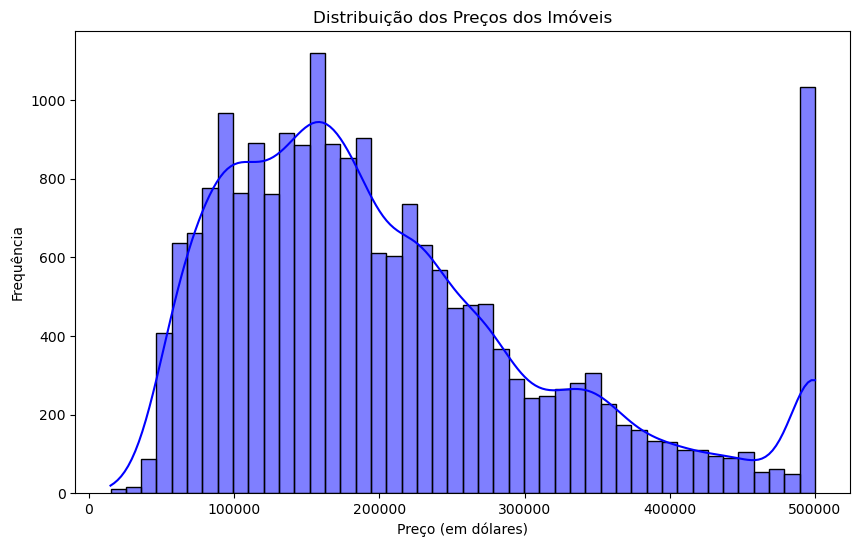

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, color='blue')
plt.title("Distribuição dos Preços dos Imóveis")
plt.xlabel("Preço (em dólares)")
plt.ylabel("Frequência")
plt.show()

Conclusões:
- A maior parte dos imóveis está na faixa de preços entre USD100.000 e USD300.000 dólares, sugerindo que a maioria dos imóveis é acessível ao público em geral.
- Existe um pico em torno do preço máximo (cerca de $500.000), indicando um possível limite superior de preço no dataset (talvez um limite imposto pelos dados ou um teto no valor real dos imóveis).
- A distribuição é assimétrica à direita, com valores extremos que podem ser considerados outliers, possivelmente afetando os modelos de regressão.

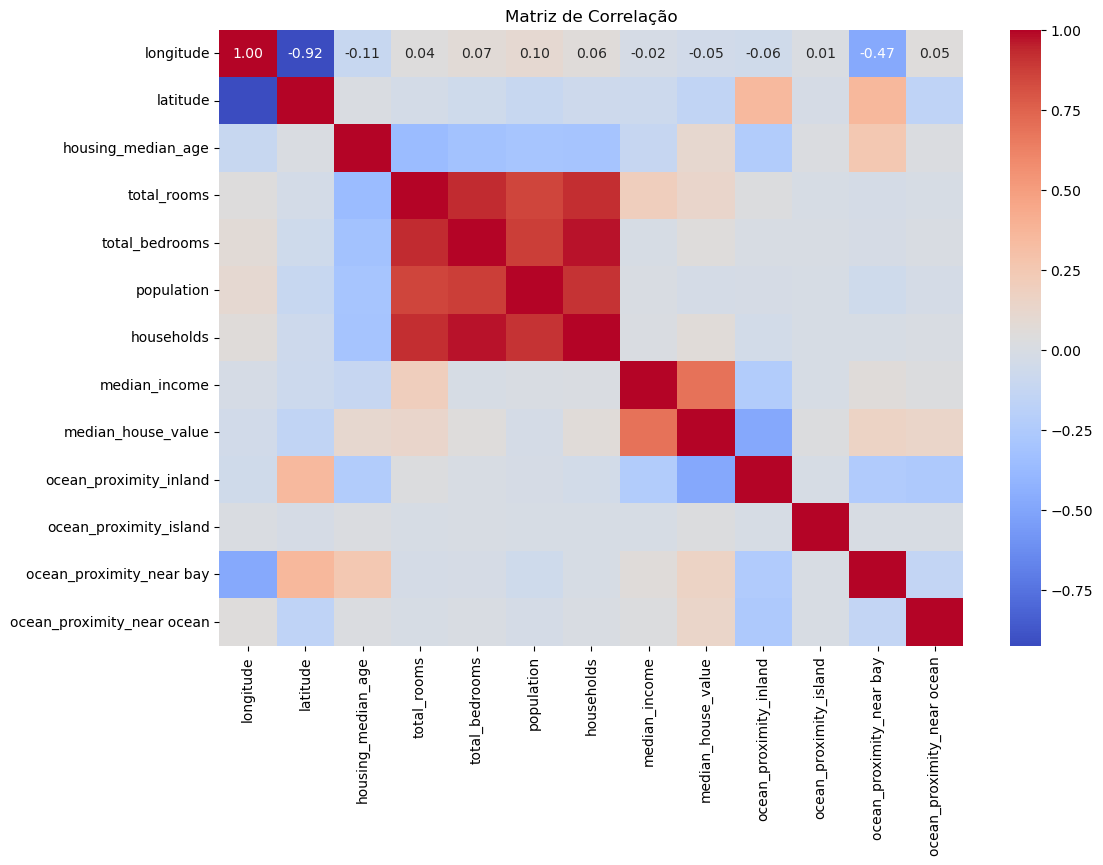

In [32]:
# Matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

A matriz de correlação exibe a relação entre diferentes variáveis no conjunto de dados.

Conclusões:
- A variável 'median_income' possui a maior correlação positiva com o preço médio das casas (median_house_value), sugerindo que a renda média de uma região é um dos principais fatores que determinam o valor dos imóveis.
- Outras variáveis, como 'housing_median_age', também apresentam correlação positiva moderada com os preços, indicando que regiões com imóveis mais antigos podem ser mais valorizadas.
- A latitude e longitude têm correlação negativa, sugerindo que a localização geográfica tem impacto nos preços.
- As variáveis categóricas de proximidade ao oceano (ocean_proximity_*) têm pouca ou nenhuma correlação com o preço médio diretamente, mas ainda podem ser úteis em modelos devido a interações.

## Treinando Modelo

In [33]:
#criar uma instância do modelo de Regressão Linear
model = LinearRegression()

#treinar o modelo
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Prever os valores no conjunto de teste
y_pred = model.predict(X_test)

# Métricas de avaliação
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Desempenho do Modelo:")
print(f"RMSE (Erro Médio Quadrático): {rmse:.2f}")
print(f"R² (Coeficiente de Determinação): {r2:.2f}")

Desempenho do Modelo:
RMSE (Erro Médio Quadrático): 70060.52
R² (Coeficiente de Determinação): 0.63


## Visualização do Resultado

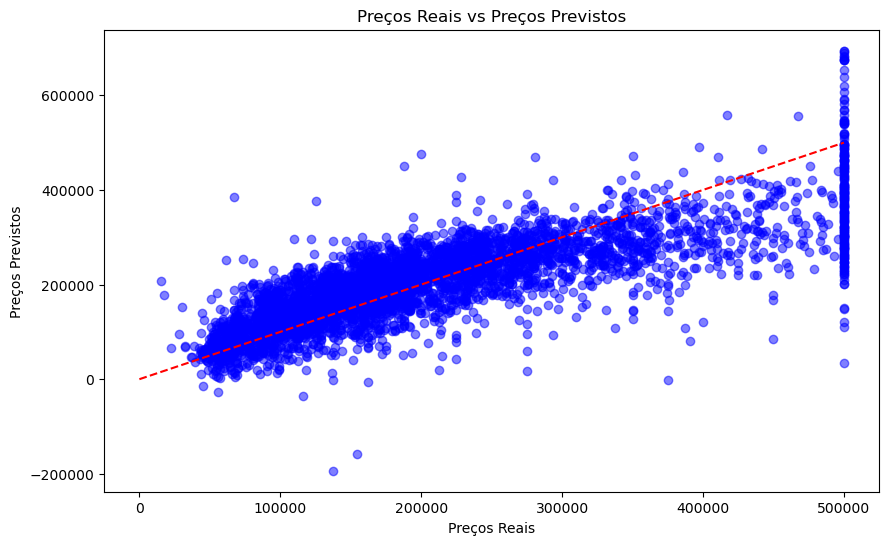

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.title("Preços Reais vs Preços Previstos")
plt.xlabel("Preços Reais")
plt.ylabel("Preços Previstos")
plt.show()

Este gráfico compara os preços reais dos imóveis com os preços previstos pelo modelo de regressão linear.

Conclusões:

- O modelo mostra um padrão linear claro, indicando que ele conseguiu capturar bem a relação entre as variáveis preditoras e o preço dos imóveis.
- A maior dispersão ocorre em valores mais altos do preço, indicando que o modelo pode estar subestimando ou superestimando os preços de imóveis mais caros, possivelmente devido a outliers ou limites no modelo.
- Apesar disso, a linha de tendência está alinhada, mostrando que o modelo tem bom desempenho geral, mas ainda pode ser aprimorado.

## Conclusões

- Distribuição de Preços: A análise revela que a maioria dos imóveis está em faixas acessíveis, mas há valores extremos que devem ser tratados com cautela.
- Correlação: A renda média (median_income) é o principal fator determinante do preço dos imóveis, enquanto outras variáveis, como localização e idade das casas, desempenham papéis menores.

Essas informações podem ser úteis para construtoras, imobiliárias ou investidores no mercado de imóveis ao decidir quais fatores priorizar para precificar ou prever a demanda por propriedades.